<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# House Price Prediction

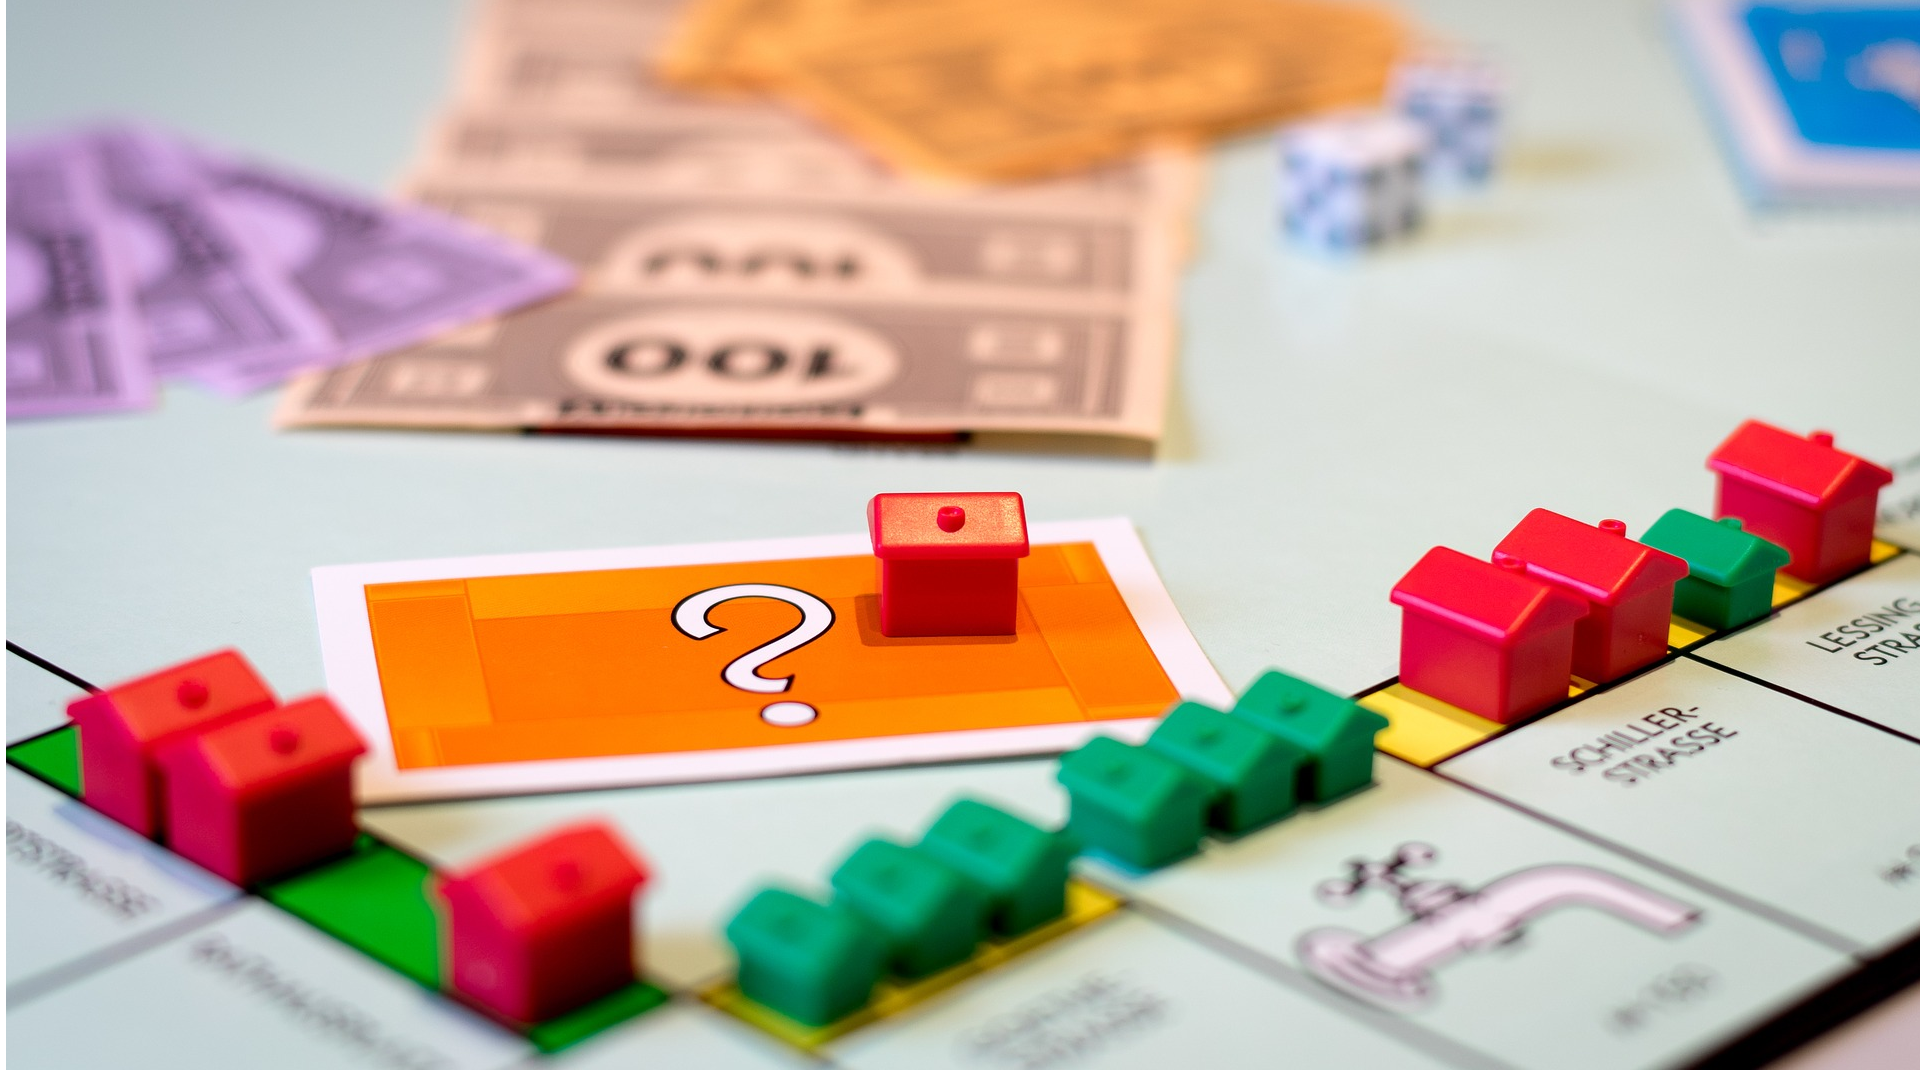

**Name:** Vishal J Ghadigaonkar<br>
**Email:** vishaljg@hotmail.com<br>
**Batch:** Jan2020<br>
**Term:** Term 3 (Machine Learning Foundation)

<a id=top></a>
## Table of Content

1. [Problem Statement](#section1)<br>
2. [Installing and Importing Packages](#section2)<br>
3. [Data Loading and Description](#section3)<br>
    - 3.1 [Importing the Dataset](#section301)<br>
    - 3.2 [Data Description](#section302)<br>
        - 3.2.1 [Describing Numerical Data](#section3021)
        - 3.2.2 [Describing Categorical Data](#section3022)
4. [Exploratory Data Analysis](#section4)<br>
    - 4.1 [Distribution of SalePrice - Target Variable](#section401)<br>
    - 4.2 [Missing Values Treatment](#section402)<br>
    - 4.3 [Numerical and Categorical features seperation and Analysis](#section403)<br>
        - 4.3.1 [Numerical Data Distribution](#section4031)
        - 4.3.2 [Relation of Numerical features with SalePrice_Log](#section4032)  
        - 4.3.3 [Categorical Data Distribution](#section4033)  
        - 4.3.4 [Relation to SalePrice for all categorical features](#section4034)  
    - 4.4 [Data Processing and Features Selection](#section404)<br>
        - 4.4.1 [Maintaining list categorical features , which are Strongly and Weakly correlated with Sale Price](#section4041)
        - 4.4.2 [Dropping Columns with weak correlation with SalePrice_Log](#section4042)  
        - 4.4.3 [Investigaing values in selected categorical features](#section4043)  
        - 4.4.4 [Convert categorical columns to numerical basis](#section4044)      
    - 4.5 [Handling Multicollinearity within features](#section405)<br>
5. [Model Development and Evaluation](#section5)<br>
    - 5.1 [Preparing X and y](#section501)<br>
    - 5.2 [Splitting X and y into training and test datasets.](#section502)<br>
    - 5.3 [Standardization of features using stanadard scalar](#section503)<br>
    - 5.4 [Linear Regression](#section504)<br>
    - 5.5 [Decision Tree Regression](#section505)<br>
    - 5.6 [Random Forest Regression](#section506)<br>
    - 5.7 [Model Evaluation Results](#section507)<br>
6. [Conclusion](#section6)<br>


<a id=section1></a>

## 1. Problem Statement

Housing prices are based on various features like Area, in Sq. ft/mtr, Neighborhood, Garage area, External quality , No of Bathrooms, Kitchen quality, Access to street  etc.

Our goal is to have a good prediction model in place, by training data with differnt algorithms and choose one basis evaluation.

We need to 
- Visualize the __relationship__ between the _features_ and the _House Selling Price_.
- Apply the basic Regression models and evaluate same to choose best out of same

 <p style="text-align:right;"><a align=right href="#top">Go to Top</a></p>

<a id=section2></a>
## 2. Installing and Importing Packages

In [146]:
import pandas as pd
import numpy as np
# For Random seed values
from random import randint

# For Data Visualization
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

%matplotlib inline

# For Scientific Computation
from scipy import stats
from scipy.stats import norm

# For model evaluation
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 300)
pd.options.mode.chained_assignment = None

sns.set_style("white")

import warnings
warnings.filterwarnings(action = "ignore")


 <p style="text-align:right;"><a align=right href="#top">Go to Top</a></p>

<a id=section3></a>
## 3. Data Loading and Description

<a id=section301></a>
### 3.1&nbsp;&nbsp;Importing the Dataset

In [147]:
dfhouse = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv')
dfhouse.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

 <p style="text-align:right;"><a align=right href="#top">Go to Top</a></p>

<a id=section302></a>
### 3.2&nbsp;&nbsp;Data Description

In [148]:
dfhouse.shape

(1460, 81)

The housing dataset has below information.<br>
Data has 1460 Rows and 81 Columns (ID Column- No use, SalePrice - Target Variable, 79 Features)

| ID | Column       | Description |
| :--| :--| :--|
|1   | **SalePrice** | The property's sale price in dollars. This is the target variable that you're trying to predict.|
|2   |**MSSubClass** | The building class|
|3   |**MSZoning**   | The general zoning classification|
|4   |**LotFrontage**| Linear feet of street connected to property|
|5   |**LotArea**    | Lot size in square feet|
|6   |**Street**     | Type of road access|
|7   |**Alley**      | Type of alley access|
|8   |**LotShape**   | General shape of property
|9   |**LandContour**| Flatness of the property|
|10  |**Utilities**  | Type of utilities available|
|11  |**LotConfig**  | Lot configuration|
|12  |**LandSlope**  | Slope of property|
|13|**Neighborhood**| Physical locations within Ames city limits|
|14|**Condition1**| Proximity to main road or railroad|
|15|**Condition2**| Proximity to main road or railroad (if a second is present)|
|16|**BldgType**| Type of dwelling|
|17|**HouseStyle**| Style of dwelling|
|18|**OverallQual**| Overall material and finish quality|
|19|**OverallCond**| Overall condition rating|
|20|**YearBuilt**| Original construction date|
|21|**YearRemodAdd**| Remodel date|
|22|**RoofStyle**| Type of roof|
|23|**RoofMatl**| Roof material3SsnPorch|
|24|**Exterior1st**| Exterior covering on house|
|25|**Exterior2nd**| Exterior covering on house (if more than one material)|
|26|**MasVnrType**| Masonry veneer type|
|27|**MasVnrArea**| Masonry veneer area in square feet|
|28|**ExterQual**|Exterior material quality|
|29|**ExterCond**| Present condition of the material on the exterior|
|30|**Foundation**|Type of foundation|
|31|**BsmtQual**| Height of the basement|
|32|**BsmtCond**|General condition of the basement|
|33|**BsmtExposure**| Walkout or garden level basement walls|
|34|**BsmtFinType1**| Quality of basement finished area|
|35|**BsmtFinSF1**| Type 1 finished square feet|
|36|**BsmtFinType2**| Quality of second finished area (if present)|
|37|**BsmtFinSF2**| Type 2 finished square feet|
|38|**BsmtUnfSF**|Unfinished square feet of basement area|
|39|**TotalBsmtSF**|Total square feet of basement area|
|40|**Heating**|Type of heating|
|41|**HeatingQC**| Heating quality and condition|
|42|**CentralAir**| Central air conditioning|
|43|**Electrical**| Electrical system|
|44|**1stFlrSF**| First Floor square feet|
|45|**2ndFlrSF**| Second floor square feet|
|46|**LowQualFinSF**| Low quality finished square feet (all floors)|
|47|**GrLivArea**| Above grade (ground) living area square feet|
|48|**BsmtFullBath**| Basement full bathrooms|
|49|**BsmtHalfBath**| Basement half bathrooms|
|50|**FullBath**| Full bathrooms above grade|
|51|**HalfBath**| Half baths above grade|
|52|**Bedroom**| Number of bedrooms above basement level|
|53|**Kitchen**| Number of kitchens|
|54|**KitchenQual**| Kitchen quality|
|55|**TotRmsAbvGrd**| Total rooms above grade (does not include bathrooms)|
|56|**Functional**| Home functionality rating|
|57|**Fireplaces**| Number of fireplaces|
|58|**FireplaceQu**| Fireplace quality|
|59|**GarageType**| Garage locationliv|
|60|**GarageYrBlt**| Year garage was built|
|61|**GarageFinish**| Interior finish of the garage|
|62|**GarageCars**| Size of garage in car capacity|
|63|**GarageArea**| Size of garage in square feetWoodDeckSF|
|64|**GarageQual**| Garage quality|
|65|**GarageCond**| Garage condition|
|66|**PavedDrive**| Paved driveway|
|67|**WoodDeckSF**| Wood deck area in square feet|
|68|**OpenPorchSF**| Open porch area in square feet|
|69|**EnclosedPorch**| Enclosed porch area in square feet|
|70|**3SsnPorch**| Three season porch area in square feet|
|71|**ScreenPorch**| Screen porch area in square feet|
|72|**PoolArea**| Pool area in square feet|
|73|**PoolQC**| Pool quality|
|74|**Fence**| Fence quality|
|75|**MiscFeature**| Miscellaneous feature not covered in other categories|
|76|**MiscVal**| $Value of miscellaneous feature|
|77|**MoSold**| Month Sold|
|78|**YrSold**| Year Sold|
|79|**SaleType**| Type of sale|
|80|**SaleCondition**| Condition of sale|

 <p style="text-align:right;"><a align=right href="#top">Go to Top</a></p>

In [149]:
dfhouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Data has 38 continous and 43 catagorical columns as per info.

 <p style="text-align:right;"><a align=right href="#top">Go to Top</a></p>

<a id=section3021></a>
#### 3.2.1&nbsp;&nbsp;Describing Numerical Data

In [150]:
dfcontdesc = dfhouse.describe().transpose() 
dfcontdesc

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

#### Observations
- Average house selling price is  180921.20  , Minimum Price is 34900.0 and maximum price is 755000.0 in Dollars
- Above table show that there are some missing values for LotFrontage,MasVnrArea,GarageYrBlt
- Many columns have Zero as the minimum value, we need to check count of rows for such coumns with Zero.
- SalePrice mean and median have huge difference. This in turn tells us SalePrice which is Target Variable is not Noramlly Distributed.


 <p style="text-align:right;"><a align=right href="#top">Go to Top</a></p>

<a id=section3022></a>
#### 3.2.2&nbsp;&nbsp;Describing Categorical features

In [151]:
dfuniqueCat = dfhouse.describe(include=np.object).transpose() 
dfuniqueCat

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

#### Observations
- There are large no of  missing values for Alley, FireplaceQu, PoolQC, Fence, MiscFeature. We need to see the impact and decide whether we can drop such columns.
- There are few no of missing values for MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType2, Electrical,GarageType, GarageFinish, GarageQual, GarageCond for which we need to see whether we can treat the same.
- Above table also shows Value for the fields with highest frequency like almost every house is having street type as **Pave**,Utilities  as **AllPub**, Conditon2 as **Norm**, RoofMatl as **CompShg**, Heating as **GasA**. Due to high frequency of these, values respective columns might hardly impact the price.

 <p style="text-align:right;"><a align=right href="#top">Go to Top</a></p>

<a id=section4></a>
## 4. Exploratory Data Analysis

<a id=section401></a>
### 4.1&nbsp;&nbsp;Distribution of SalePrice - Target Variable

Text(0.97, 0.85, 'Kurt: 6.536282')

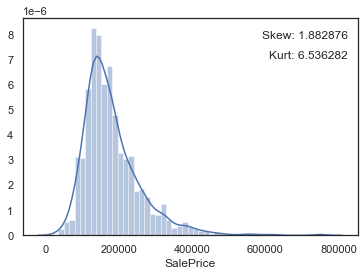

In [152]:

fig, ax = plt.subplots()
sns.distplot(dfhouse['SalePrice'], ax = ax);
ax.text(x=0.97, y=0.94, transform=ax.transAxes, s="Skew: %f" % dfhouse['SalePrice'].skew(),\
        fontsize=12, verticalalignment='top', horizontalalignment='right')  
ax.text(x=0.97, y=0.85, transform=ax.transAxes, s="Kurt: %f" % dfhouse['SalePrice'].kurt(),\
        fontsize=12, verticalalignment='top', horizontalalignment='right')  

The target variable SalePrice is not normally distributed. 
Therfore we make a log transformation, to make it normally distributed.

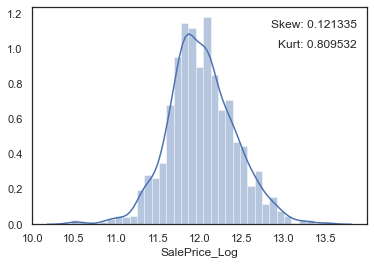

In [153]:
dfhouse['SalePrice_Log'] = np.log(dfhouse['SalePrice'])


fig, ax = plt.subplots()
sns.distplot(dfhouse['SalePrice_Log'], ax = ax);
ax.text(x=0.97, y=0.94, transform=ax.transAxes, s="Skew: %f" % dfhouse['SalePrice_Log'].skew(),\
        fontsize=12, verticalalignment='top', horizontalalignment='right')  
ax.text(x=0.97, y=0.85, transform=ax.transAxes, s="Kurt: %f" % dfhouse['SalePrice_Log'].kurt(),\
        fontsize=12, verticalalignment='top', horizontalalignment='right') 
dfhouse.drop('SalePrice', axis= 1, inplace=True)

 <p style="text-align:right;"><a align=right href="#top">Go to Top</a></p>

<a id=section402></a>
### 4.2&nbsp;&nbsp; Missing Values Treatment

In [154]:
total = dfhouse.isnull().sum().sort_values(ascending=False)
percent = ((dfhouse.isnull().sum()/dfhouse.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total    Percent
PoolQC         1453  99.520548
MiscFeature    1406  96.301370
Alley          1369  93.767123
Fence          1179  80.753425
FireplaceQu     690  47.260274
LotFrontage     259  17.739726
GarageCond       81   5.547945
GarageType       81   5.547945
GarageYrBlt      81   5.547945
GarageFinish     81   5.547945
GarageQual       81   5.547945
BsmtExposure     38   2.602740
BsmtFinType2     38   2.602740
BsmtFinType1     37   2.534247
BsmtCond         37   2.534247
BsmtQual         37   2.534247
MasVnrArea        8   0.547945
MasVnrType        8   0.547945
Electrical        1   0.068493
Utilities         0   0.000000

From understanding of data NAN is not missing value for field s like PoolQC, Alley, MiscFeature, Fence etc.
Ite means that such houses don't have Pool, Alley.

So we need to replace NAN with None.

In [155]:
# columns where NaN values have meaning e.g. no pool etc.
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

# replace 'NaN' with 'None' in these columns
for col in cols_fillna:
    dfhouse[col].fillna('None',inplace=True)

In [156]:
total = dfhouse.isnull().sum().sort_values(ascending=False)
percent = ((dfhouse.isnull().sum()/dfhouse.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

Total    Percent
LotFrontage      259  17.739726
GarageYrBlt       81   5.547945
MasVnrArea         8   0.547945
SalePrice_Log      0   0.000000
ExterCond          0   0.000000

We can fill missing values for remaining fields with Mean value.

In [157]:
dfhouse.fillna(dfhouse.mean(), inplace=True)

Checking again for missing values

In [158]:
total = dfhouse.isnull().sum().sort_values(ascending=False)
percent = ((dfhouse.isnull().sum()/dfhouse.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

Total  Percent
SalePrice_Log      0      0.0
Heating            0      0.0
RoofStyle          0      0.0
RoofMatl           0      0.0
Exterior1st        0      0.0

 <p style="text-align:right;"><a align=right href="#top">Go to Top</a></p>

<a id=section403></a>
### 4.3&nbsp;&nbsp;Numerical and Categorical features seperation and Analysis

<a id=section4031></a> 
#### 4.3.1&nbsp;&nbsp;Numerical Data Distribution

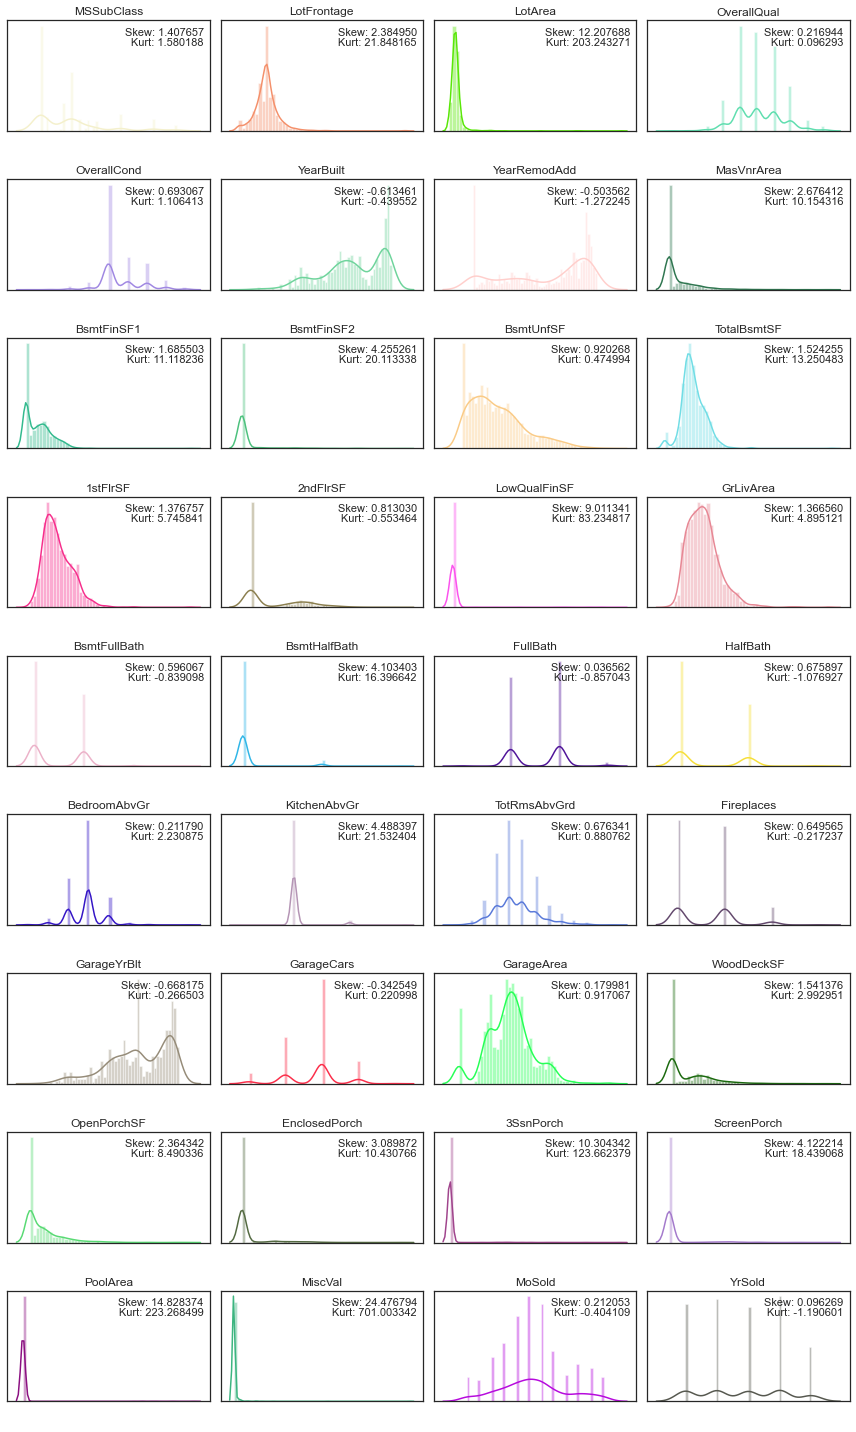

In [159]:
colnames_numerics_only = dfhouse.select_dtypes(include=np.number).columns.tolist()
fig, axes = plt.subplots(nrows =9 , ncols = 4, sharex = False, figsize=(12, 20))
colors = []
for i in range(36):
  colors.append('#%06X' % randint(0, 0xFFFFFF))
columns = colnames_numerics_only[1:]
for ax, col, color in zip(axes.flat, columns, colors):
  sns.distplot(a = dfhouse[col], bins = 50, ax = ax, color = color)
  ax.set_title(col)
  plt.setp(axes, yticks=[])
  ax.set_xlabel(' ')
  ax.set_xticklabels(labels = ' ')
  ax.grid(False)
  ax.text(x=0.97, y=0.94, transform=ax.transAxes, s="Skew: %f" % dfhouse[col].skew(),\
        fontsize=11, verticalalignment='top', horizontalalignment='right')  
  ax.text(x=0.97, y=0.85, transform=ax.transAxes, s="Kurt: %f" % dfhouse[col].kurt(),\
        fontsize=11, verticalalignment='top', horizontalalignment='right')  
plt.tight_layout()
plt.show()

#### Observations

- Most of the features are positively skewed.
- GarageYrBlt and GarageCars are slightly negatively skewed
- OverallQual,TotRmsAbvGrd, GarageArea, MoSold are normally distributed.
- Columns like 3SsnPorch, ScreenPorch, PoolArea, MiscVal, LowQualFinSF, BsmtHalfBath, BsmtFinSF2 are having almost constant values.

 <p style="text-align:right;"><a align=right href="#top">Go to Top</a></p>

<a id=section4032></a>
#### 4.3.2&nbsp;&nbsp;Relation of Numerical features with SalePrice_Log

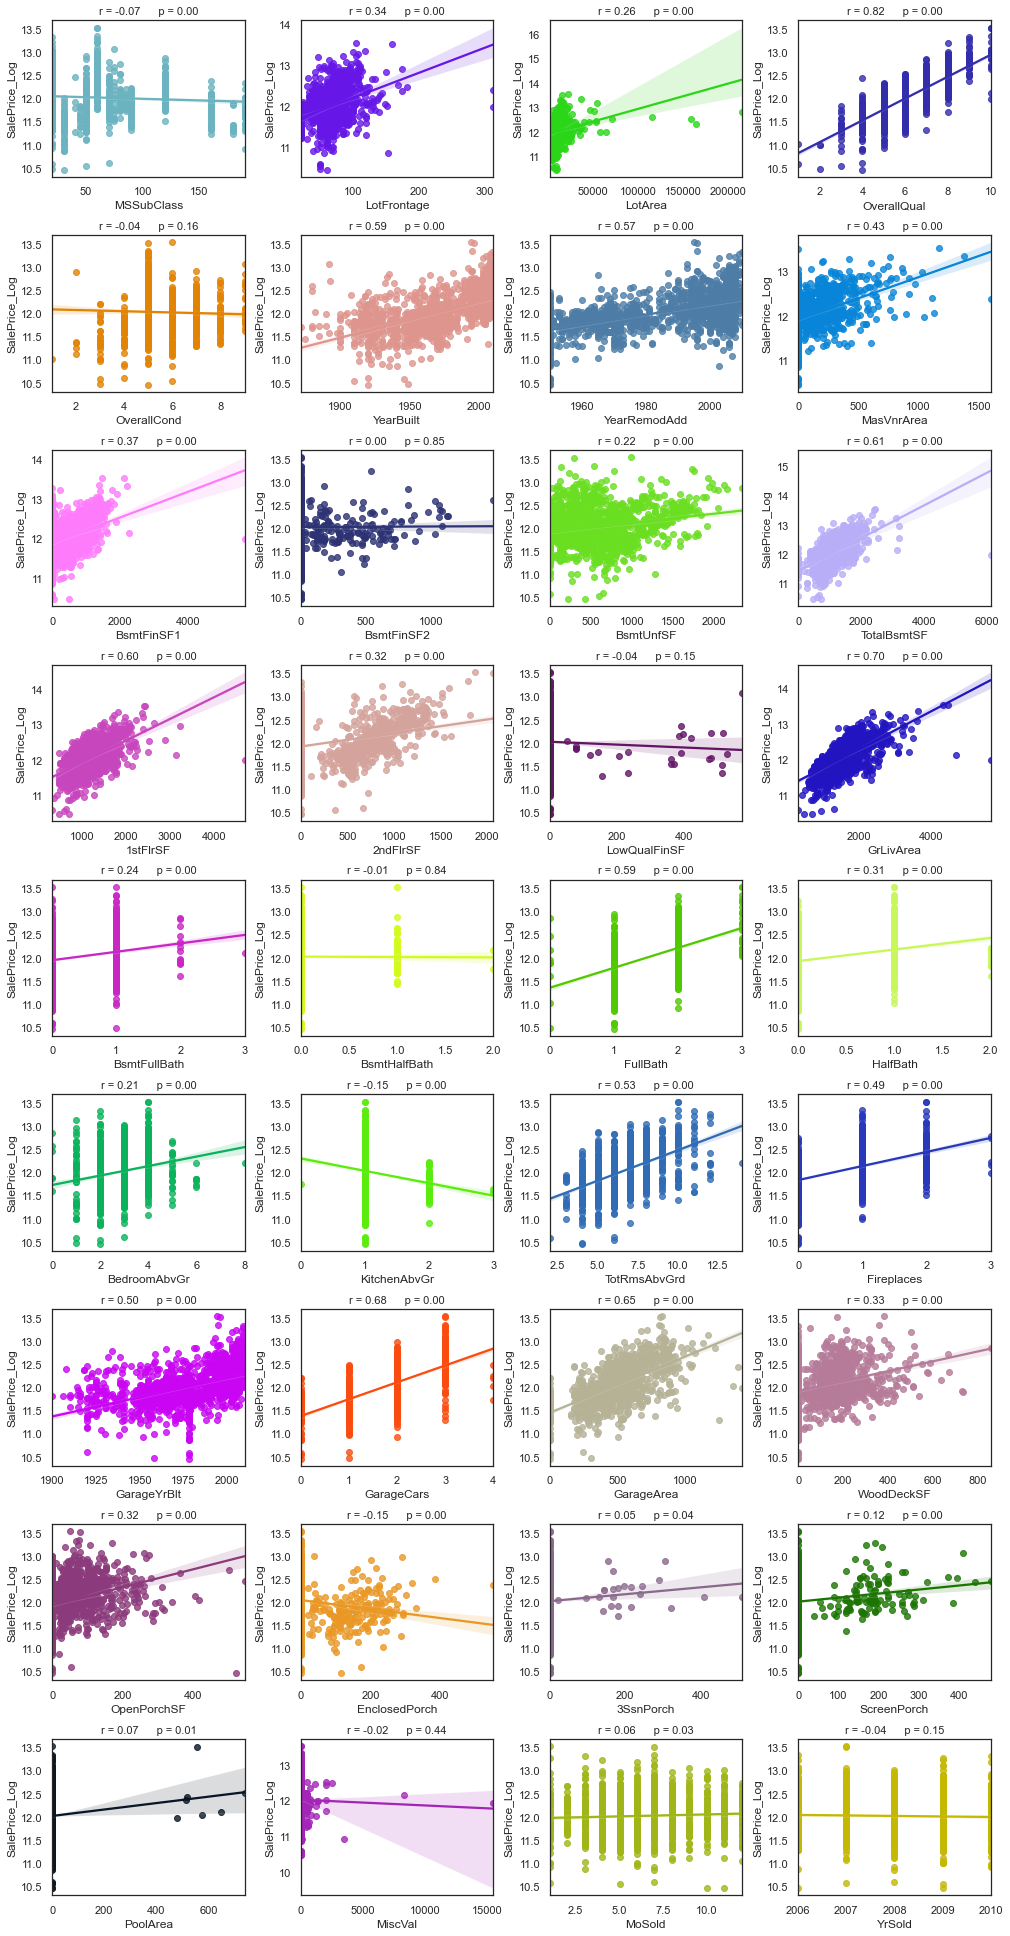

In [160]:
nr_rows = 9
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))
colors = []
li_num_feats = dfhouse.select_dtypes(include=np.number).columns.tolist()
li_not_plot = ['Id', 'SalePrice_Log']
li_plot_num_feats = [c for c in list(colnames_numerics_only) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        colors.append('#%06X' % randint(0, 0xFFFFFF))
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(dfhouse[li_plot_num_feats[i]], dfhouse['SalePrice_Log'], ax = axs[r][c],color = colors[i] )
            stp = stats.pearsonr(dfhouse[li_plot_num_feats[i]], dfhouse['SalePrice_Log'])
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()

#### Observations

From above regression plots we can see following observations.
- **Salesprice_Log has high positive correlation of 0.4 and above for <br>**
    OverallQual(0.82), GrLivArea(0.70), GarageCars(0.68), GarageArea(0.65), TotalBsmtSF(0.61) <br>
    1stFlrSF(0.60), FullBath(0.60), YearBuilt(0.59), YearRemodAdd (0.57), TotRmsAbvGrd (0.53) <br>
    GarageYrBlt(0.50), Fireplaces(0.49), MasVnrArea(0.43)
- **Sales price is not much dependent on below features**
     MSSubClass,PoolArea,MoSold,3SsnPorch,LowQualFinSF,YrSold,OverallCond,MiscVal,BsmtHalfBath,BsmtFinSF2
- **For this study we will consider numerical features on which Sale price is highly dependent (Correlation with SalePrice_Log > 0.4)**

 <p style="text-align:right;"><a align=right href="#top">Go to Top</a></p>

#### Maintaining list numerical features , which are Strongly and Weakly correlated with Sale Price

In [161]:
corr = dfhouse.corr()
corr_abs = corr.abs()

#Threshold for minimum corrrlation value
min_val_corr = 0.4

nr_num_cols = len(colnames_numerics_only)
ser_corr = corr_abs.nlargest(nr_num_cols, 'SalePrice_Log')['SalePrice_Log']

num_strong_corr = list(ser_corr[ser_corr.values > min_val_corr].index)
num_weak_corr = list(ser_corr[ser_corr.values <= min_val_corr].index)
print(num_strong_corr)
print(num_weak_corr)


['SalePrice_Log', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageYrBlt', 'Fireplaces', 'MasVnrArea']
['BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'EnclosedPorch', 'KitchenAbvGr', 'ScreenPorch', 'MSSubClass', 'PoolArea', 'MoSold', '3SsnPorch', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MiscVal', 'Id', 'BsmtHalfBath', 'BsmtFinSF2']


 <p style="text-align:right;"><a align=right href="#top">Go to Top</a></p>

<a id=section4033></a>
#### 4.3.3&nbsp;&nbsp; Categorical Data Distribution

In [162]:
colnames_category_only = dfhouse.select_dtypes(include=np.object).columns.tolist()

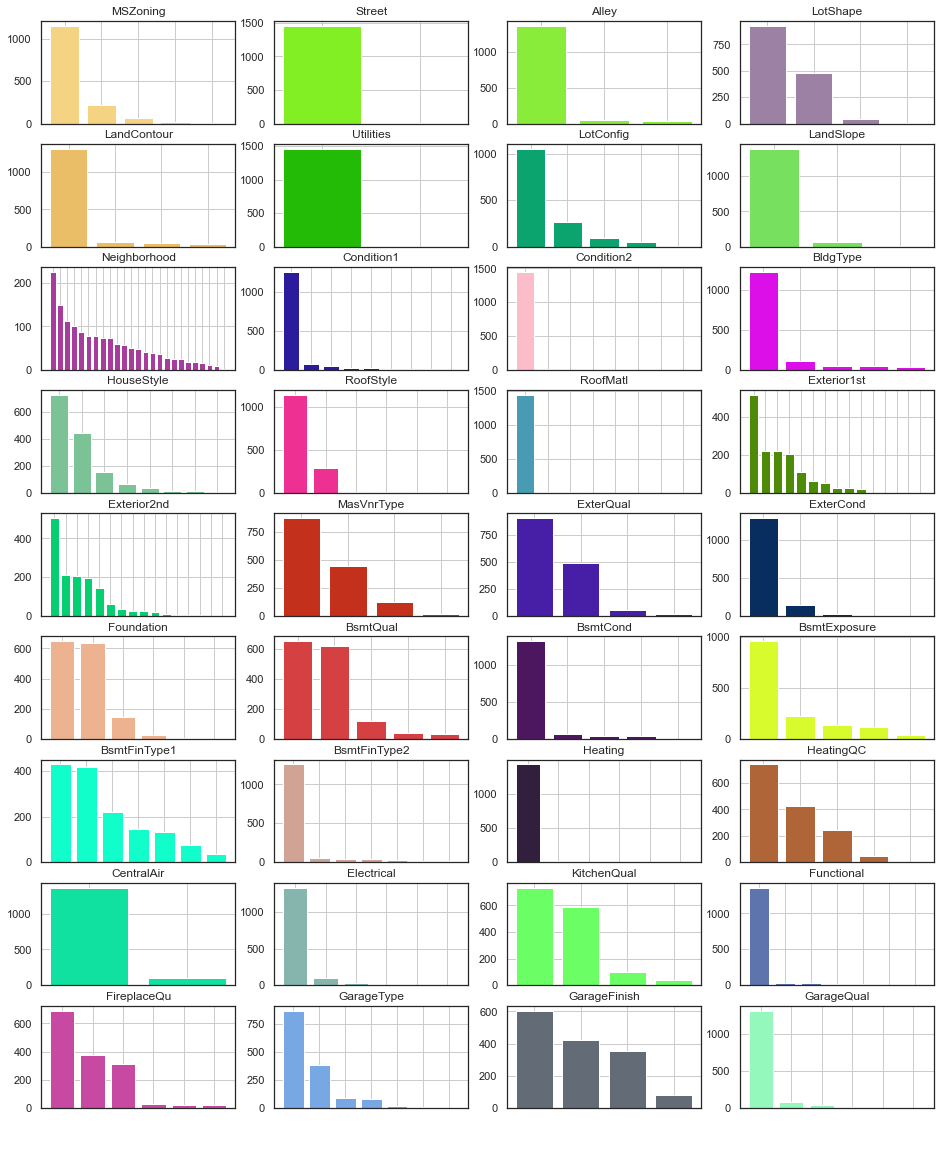

In [163]:
fig, axes = plt.subplots(nrows = 9, ncols = 4, sharex = False, figsize=(16, 20))
colors = []
for i in range(36):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
for ax, col, color in zip(axes.flat, colnames_category_only, colors):
    ax.bar(x = dfhouse[col].value_counts().index, height = dfhouse[col].value_counts(), color = color)
    ax.set_title(col)
    ax.set_xlabel(' ')
    ax.set_xticklabels(labels = ' ')
    ax.grid(True)

#### Observation
- Columns like Utilities, Street, Condition2, RoofMatl, Heating are having almost constant values.

 <p style="text-align:right;"><a align=right href="#top">Go to Top</a></p>

<a id=section4034></a>
#### 4.3.4&nbsp;&nbsp;Relation to SalePrice for all categorical features

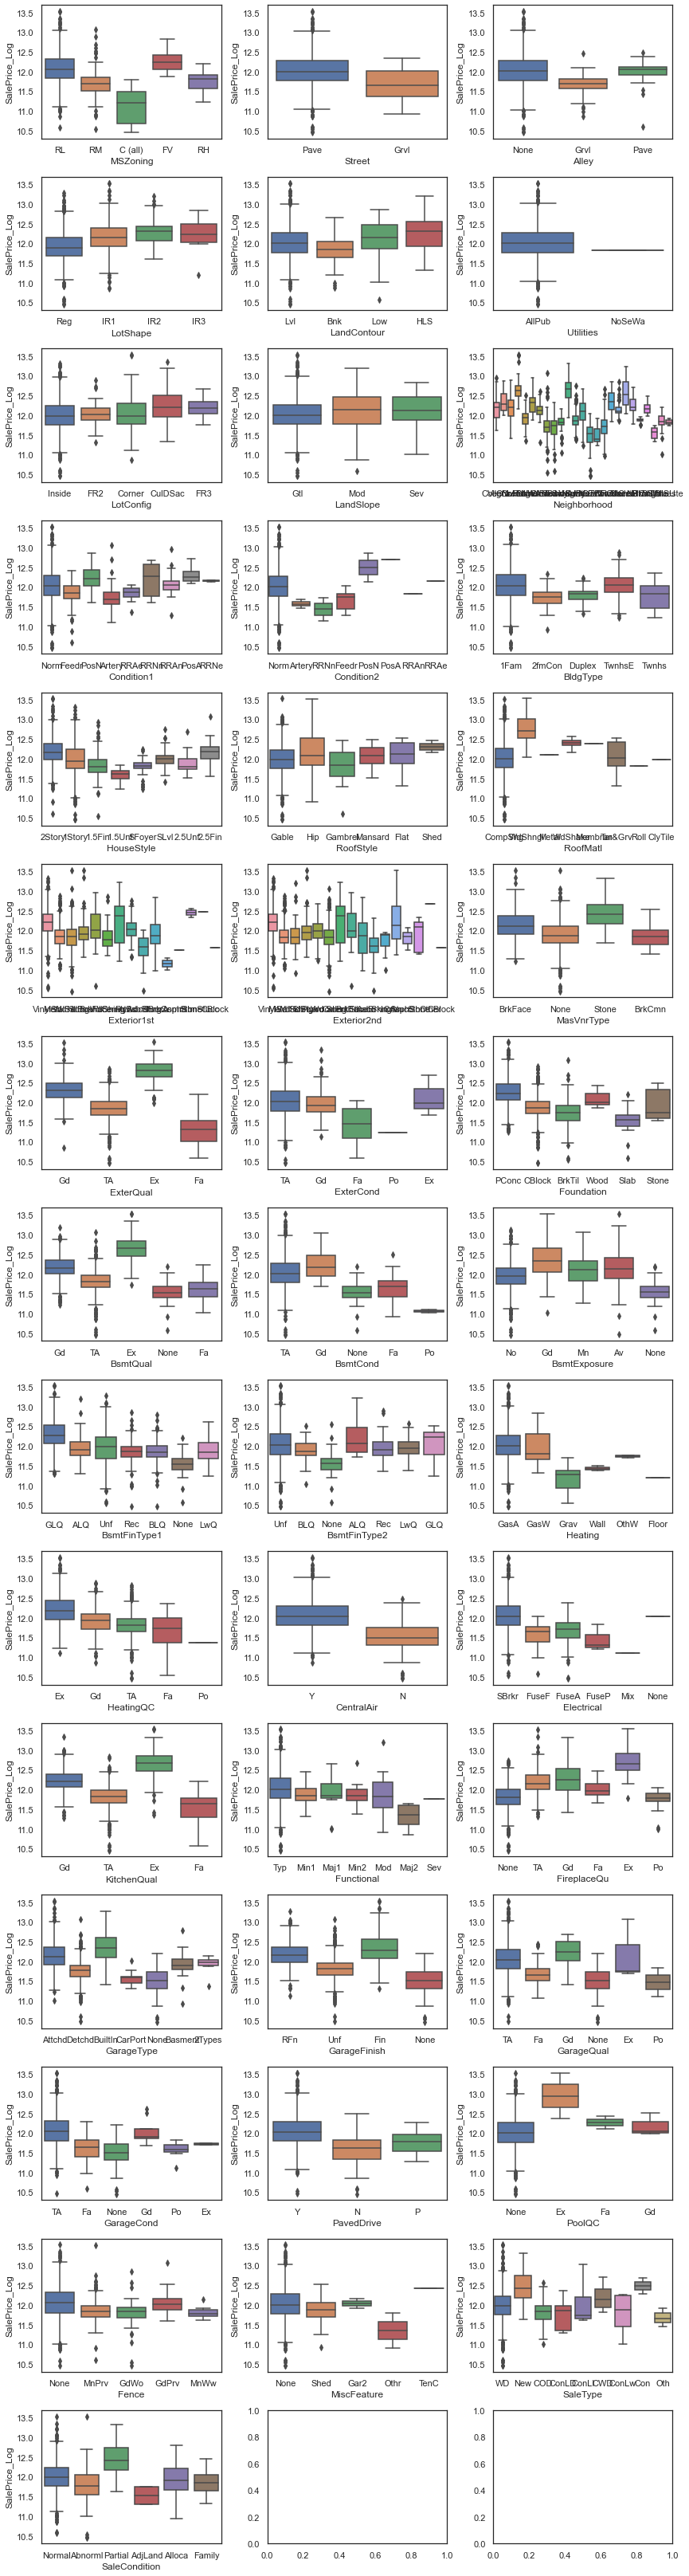

In [164]:

nr_rows = 15
nr_cols = 3


fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(12,45))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(colnames_category_only):
            sns.boxplot(x=colnames_category_only[i], y='SalePrice_Log', data=dfhouse, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()   

#### Observation

- For many of the categorical there is no strong relation to the Sale Price.
- Strong relation can be seen for features from the figures 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType' Also for the categorical features, We will use only those that show a strong relation to SalePrice. 

 <p style="text-align:right;"><a align=right href="#top">Go to Top</a></p>

<a id=section404></a>
### 4.4&nbsp;&nbsp;Data Processing and Features Selection

<a id=section4041></a>
#### 4.4.1&nbsp;&nbsp;Maintaining list categorical features , which are Strongly and Weakly correlated with Sale Price

In [165]:
cat_strong_corr =  [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 
                    'Electrical', 'KitchenQual', 'SaleType']
cat_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition' ]

 <p style="text-align:right;"><a align=right href="#top">Go to Top</a></p>

<a id=section4042></a>
#### 4.4.2&nbsp;&nbsp;Dropping Columns with weak correlation with SalePrice_Log

In [166]:
cols_to_drop = ['Id'] + num_weak_corr + cat_weak_corr  
dfhouse.drop(cols_to_drop, inplace= True, axis = 1)

In [167]:
dfhouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
MSZoning         1460 non-null object
Neighborhood     1460 non-null object
Condition2       1460 non-null object
OverallQual      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrType       1460 non-null object
MasVnrArea       1460 non-null float64
ExterQual        1460 non-null object
BsmtQual         1460 non-null object
TotalBsmtSF      1460 non-null int64
CentralAir       1460 non-null object
Electrical       1460 non-null object
1stFlrSF         1460 non-null int64
GrLivArea        1460 non-null int64
FullBath         1460 non-null int64
KitchenQual      1460 non-null object
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
GarageYrBlt      1460 non-null float64
GarageCars       1460 non-null int64
GarageArea       1460 non-null int64
SaleType         1460 non-null object
SalePrice_Log    1460 non-nu

 <p style="text-align:right;"><a align=right href="#top">Go to Top</a></p>

<a id=section4043></a>
#### 4.4.3&nbsp;&nbsp; Investigaing values in selected categorical features

['MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual', 'CentralAir', 'Electrical', 'KitchenQual', 'SaleType']


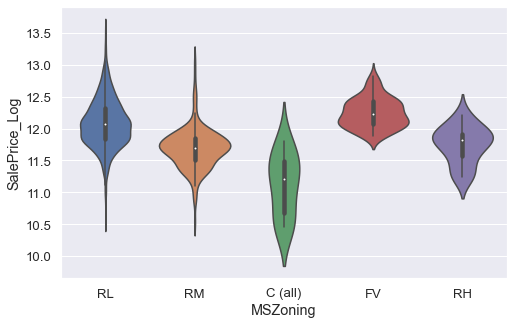

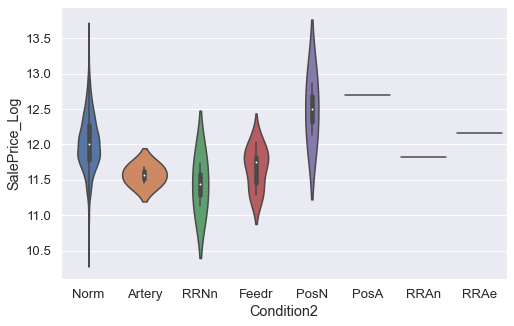

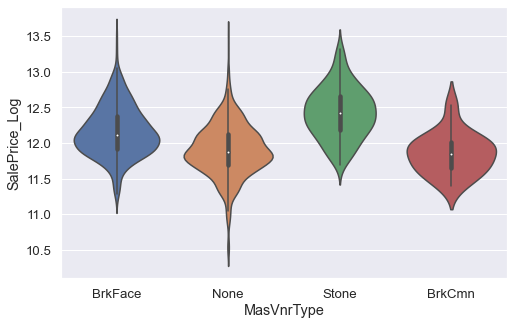

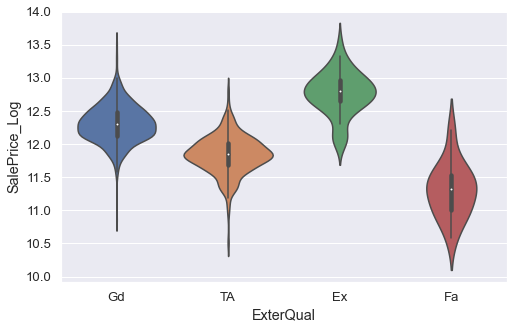

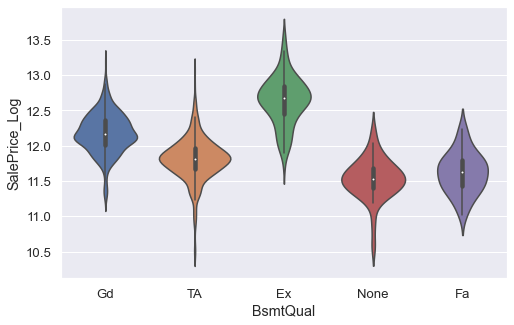

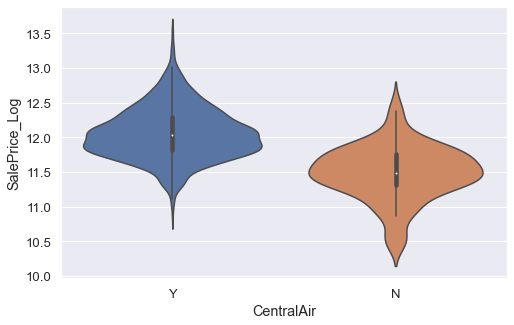

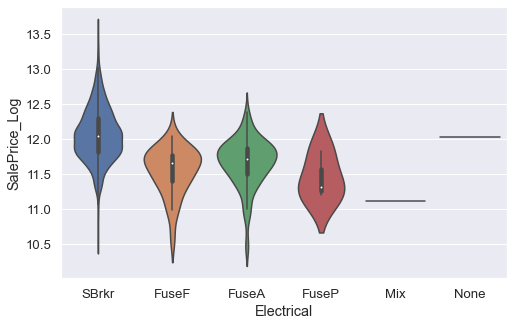

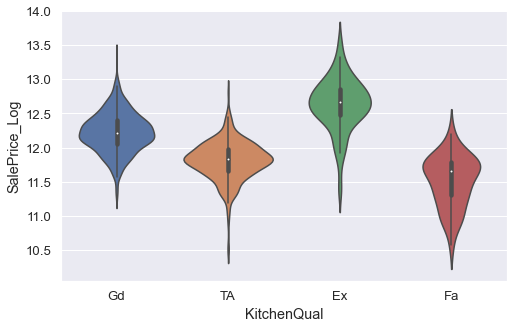

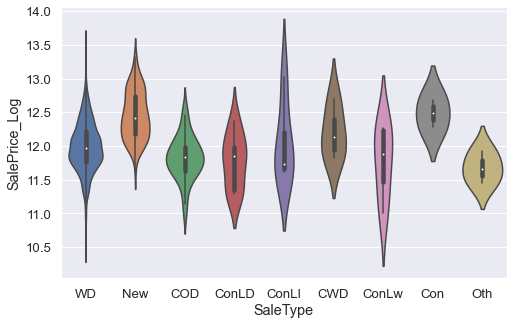

In [168]:
catg_list = cat_strong_corr.copy()
print(catg_list)
catg_list.remove('Neighborhood')
sns.set_style("darkgrid")
sns.set(font_scale=1.2)
for catg in catg_list :
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.violinplot(x=catg, y='SalePrice_Log', data=dfhouse,ax=ax)
    plt.show()

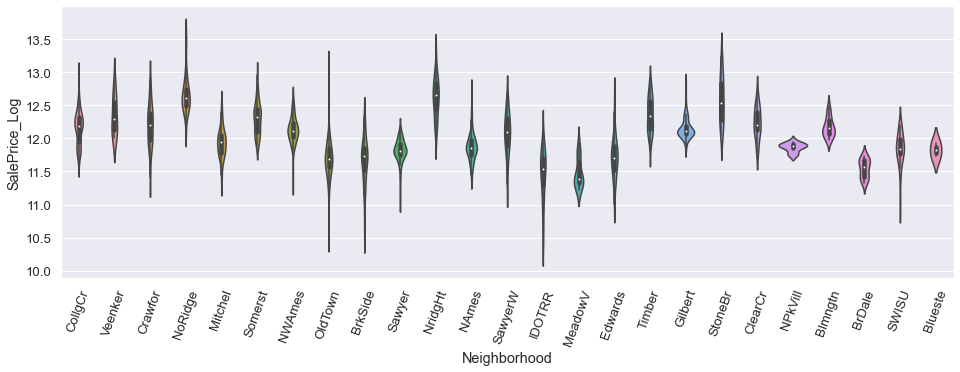

In [33]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.violinplot(x='Neighborhood', y='SalePrice_Log', data=dfhouse,ax=ax)
plt.xticks(rotation=70)
plt.show()

 <p style="text-align:right;"><a align=right href="#top">Go to Top</a></p>

<a id=section4044></a>
#### 4.4.4&nbsp;&nbsp;  Convert categorical columns to numerical basis above figures

In [169]:
    dfhouse['MSZ_num'] = 1  
    dfhouse.loc[(dfhouse['MSZoning'].isin(['RM', 'RH']) ), 'MSZ_num'] = 2    
    dfhouse.loc[(dfhouse['MSZoning'].isin(['RL', 'FV']) ), 'MSZ_num'] = 3        
    
    dfhouse['NbHd_num'] = 1       
    dfhouse.loc[(dfhouse['Neighborhood'].isin(['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', \
                                     'Somerst', 'Timber', 'Veenker']) ), 'NbHd_num'] = 2   
    
    dfhouse.loc[(dfhouse['Neighborhood'].isin(['NoRidge', 'NridgHt', 'StoneBr']) ), 'NbHd_num'] = 3    

    dfhouse['Cond2_num'] = 1       
    dfhouse.loc[(dfhouse['Condition2'].isin(['Norm', 'RRAe']) ), 'Cond2_num'] = 2    
    dfhouse.loc[(dfhouse['Condition2'].isin(['PosA', 'PosN']) ), 'Cond2_num'] = 3    
    
    dfhouse['Mas_num'] = 1       
    dfhouse.loc[(dfhouse['MasVnrType'] == 'Stone' ), 'Mas_num'] = 2 
    
    dfhouse['ExtQ_num'] = 1       
    dfhouse.loc[(dfhouse['ExterQual'] == 'TA' ), 'ExtQ_num'] = 2     
    dfhouse.loc[(dfhouse['ExterQual'] == 'Gd' ), 'ExtQ_num'] = 3     
    dfhouse.loc[(dfhouse['ExterQual'] == 'Ex' ), 'ExtQ_num'] = 4     
   
    dfhouse['BsQ_num'] = 1          
    dfhouse.loc[(dfhouse['BsmtQual'] == 'Gd' ), 'BsQ_num'] = 2     
    dfhouse.loc[(dfhouse['BsmtQual'] == 'Ex' ), 'BsQ_num'] = 3     
 
    dfhouse['CA_num'] = 0          
    dfhouse.loc[(dfhouse['CentralAir'] == 'Y' ), 'CA_num'] = 1    

    dfhouse['Elc_num'] = 1       
    dfhouse.loc[(dfhouse['Electrical'] == 'SBrkr' ), 'Elc_num'] = 2 


    dfhouse['KiQ_num'] = 1       
    dfhouse.loc[(dfhouse['KitchenQual'] == 'TA' ), 'KiQ_num'] = 2     
    dfhouse.loc[(dfhouse['KitchenQual'] == 'Gd' ), 'KiQ_num'] = 3     
    dfhouse.loc[(dfhouse['KitchenQual'] == 'Ex' ), 'KiQ_num'] = 4      
    
    dfhouse['SlTy_num'] = 2       
    dfhouse.loc[(dfhouse['SaleType'].isin(['Oth']) ), 'SlTy_num'] = 1  
    dfhouse.loc[(dfhouse['SaleType'].isin(['CWD']) ), 'SlTy_num'] = 3  
    dfhouse.loc[(dfhouse['SaleType'].isin(['New', 'Con']) ), 'SlTy_num'] = 4  
  

In [170]:
dfhouse.describe(include='object')

MSZoning Neighborhood Condition2 MasVnrType ExterQual BsmtQual  \
count      1460         1460       1460       1460      1460     1460   
unique        5           25          8          4         4        5   
top          RL        NAmes       Norm       None        TA       TA   
freq       1151          225       1445        872       906      649   

       CentralAir Electrical KitchenQual SaleType  
count        1460       1460        1460     1460  
unique          2          6           4        9  
top             Y      SBrkr          TA       WD  
freq         1365       1334         735     1267

#### Dropping converted categorical columns to numerical columns

In [171]:
#Columns to drop
drop_cols = ['MSZoning','Neighborhood','Condition2','MasVnrType','ExterQual','BsmtQual','CentralAir','Electrical','KitchenQual','SaleType']
dfhouse.drop(drop_cols, inplace=True, axis = 1)

In [172]:
dfhouse.describe(include = 'all')

OverallQual    YearBuilt  YearRemodAdd   MasVnrArea  TotalBsmtSF  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean      6.099315  1971.267808   1984.865753   103.685262  1057.429452   
std       1.382997    30.202904     20.645407   180.569112   438.705324   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000   795.750000   
50%       6.000000  1973.000000   1994.000000     0.000000   991.500000   
75%       7.000000  2000.000000   2004.000000   164.250000  1298.250000   
max      10.000000  2010.000000   2010.000000  1600.000000  6110.000000   

          1stFlrSF    GrLivArea     FullBath  TotRmsAbvGrd   Fireplaces  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   1162.626712  1515.463699     1.565068      6.517808     0.613014   
std     386.587738   525.480383     0.550916      1.625393     0.644666   
min     334.000000   334.000000     0.000000      2.000000     0.000000   
25%     882.000000  1129.500000     1.000000      5.000000     0.000000   
50%    1087.000000  1464.000000     2.000000      6.000000     1.000000   
75%    1391.250000  1776.750000     2.000000      7.000000     1.000000   
max    4692.000000  5642.000000     3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea  SalePrice_Log      MSZ_num  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137      12.024051     2.826027   
std      23.994583     0.747315   213.804841       0.399452     0.396879   
min    1900.000000     0.000000     0.000000      10.460242     1.000000   
25%    1962.000000     1.000000   334.500000      11.775097     3.000000   
50%    1978.506164     2.000000   480.000000      12.001505     3.000000   
75%    2001.000000     2.000000   576.000000      12.273731     3.000000   
max    2010.000000     4.000000  1418.000000      13.534473     3.000000   

          NbHd_num    Cond2_num      Mas_num    ExtQ_num      BsQ_num  \
count  1460.000000  1460.000000  1460.000000  1460.00000  1460.000000   
mean      1.560959     1.994521     1.087671     2.39589     1.589041   
std       0.665190     0.097804     0.282913     0.57428     0.638831   
min       1.000000     1.000000     1.000000     1.00000     1.000000   
25%       1.000000     2.000000     1.000000     2.00000     1.000000   
50%       1.000000     2.000000     1.000000     2.00000     2.000000   
75%       2.000000     2.000000     1.000000     3.00000     2.000000   
max       3.000000     3.000000     2.000000     4.00000     3.000000   

            CA_num      Elc_num      KiQ_num     SlTy_num  
count  1460.000000  1460.000000  1460.000000  1460.000000  
mean      0.934932     1.913699     2.511644     2.170548  
std       0.246731     0.280905     0.663760     0.561828  
min       0.000000     1.000000     1.000000     1.000000  
25%       1.000000     2.000000     2.000000     2.000000  
50%       1.000000     2.000000     2.000000     2.000000  
75%       1.000000     2.000000     3.000000     2.000000  
max       1.000000     2.000000     4.000000     4.000000

In [38]:
dfhouse.shape

(1460, 24)

In [173]:
corr = dfhouse.corr()
corr_abs = corr.abs()
corr_abs
nr_all_cols = len(dfhouse)
print (corr_abs.nlargest(nr_all_cols, 'SalePrice_Log')['SalePrice_Log'])

SalePrice_Log    1.000000
OverallQual      0.817184
GrLivArea        0.700927
NbHd_num         0.696515
GarageCars       0.680625
ExtQ_num         0.678840
KiQ_num          0.667893
BsQ_num          0.659285
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
GarageYrBlt      0.500449
Fireplaces       0.489449
MasVnrArea       0.429531
MSZ_num          0.409405
CA_num           0.351600
SlTy_num         0.335339
Mas_num          0.311369
Elc_num          0.304862
Cond2_num        0.105442
Name: SalePrice_Log, dtype: float64


#### As we are consdering minimum threshold of 0.4 for features correaltion with SalePrice_Log we will need to remove
CA_num,SlTy_num,Mas_num,Elc_num,Cond2_num

In [174]:
#Columns to drop
drop_cols = ['CA_num','SlTy_num','Mas_num','Elc_num','Cond2_num']
dfhouse.drop(drop_cols, inplace=True, axis = 1)

 <p style="text-align:right;"><a align=right href="#top">Go to Top</a></p>

<a id=section405></a>
### 4.5&nbsp;&nbsp;  Handling Multicollinearity within features

In [175]:
def plot_corr_matrix(df, nr_c, targ) :
    
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    plt.show()

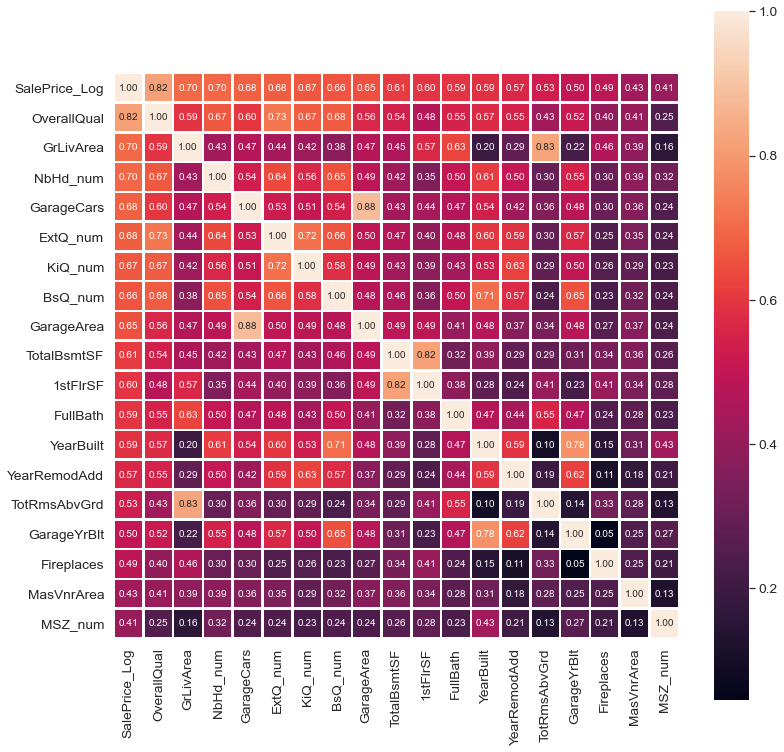

In [232]:
plot_corr_matrix(dfhouse,len(dfhouse.columns),'SalePrice_Log')

**From above figure strong correlation can be seen between**
- GrLivArea_Log and TotRmsAbvGrd (0.83)
- GarageCars and GarageArea (0.88)
- TotalBsmtSF and 1stFlrSF (0.82)
- YearBuilt and GarageYrBlt (0.78)

#### Dropping one column each from above basis less correlation with SalePrice_Log

In [176]:
#Columns to drop
drop_cols = ['TotRmsAbvGrd','GarageArea','1stFlrSF','GarageYrBlt']
dfhouse.drop(drop_cols, inplace=True, axis = 1)

#### Verfying if any more multicolineraity exist.

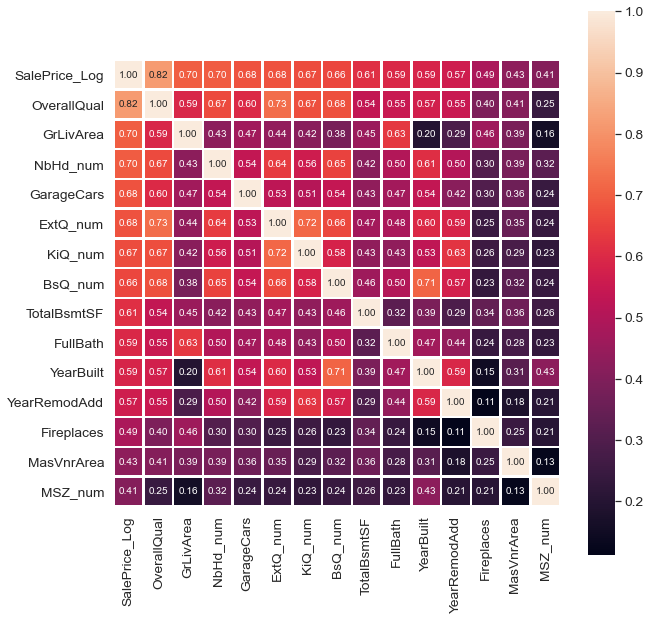

In [177]:
plot_corr_matrix(dfhouse,len(dfhouse.columns),'SalePrice_Log')

 <p style="text-align:right;"><a align=right href="#top">Go to Top</a></p>

<a id=section5></a>
## 5. Model Development and Evaluation

<a id=section501></a>
### 5.1&nbsp;&nbsp;Preparing X and y

In [178]:
X, y = dfhouse.drop('SalePrice_Log', axis = 1), dfhouse['SalePrice_Log']
feature_cols = X.columns.tolist()
 
print('X Shape:', X.shape)
print('y Shape:', y.shape)
print(feature_cols)

X Shape: (1460, 14)
y Shape: (1460,)
['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'Fireplaces', 'GarageCars', 'MSZ_num', 'NbHd_num', 'ExtQ_num', 'BsQ_num', 'KiQ_num']


 <p style="text-align:right;"><a align=right href="#top">Go to Top</a></p>

<a id=section502></a>
### 5.2&nbsp;&nbsp; Splitting X and y into training and test datasets.

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (1168, 14)
y_train shape:  (1168,)

Test cases as below
X_test shape:  (292, 14)
y_test shape:  (292,)


 <p style="text-align:right;"><a align=right href="#top">Go to Top</a></p>

<a id=section503></a>
### 5.3&nbsp;&nbsp; Standardization of features using stanadard scalar

In [180]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
sc.fit(X_train)
X_tests = sc.transform(X_test) 
X_trains = sc.transform(X_train)    # transform the data

 <p style="text-align:right;"><a align=right href="#top">Go to Top</a></p>

<a id=section504></a>
### 5.4&nbsp;&nbsp; Linear Regression

In [210]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
parameters = {'normalize':[True,False], 'copy_X':[True, False]}
linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)
linreg.fit(X_trains, y_train)                                                           # fit the model to the training data (learn the coefficients) 

GridSearchCV(cv=10, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False], 'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [211]:
y_pred_train = linreg.predict(X_trains)  

In [212]:
y_pred_test = linreg.predict(X_tests)  

In [184]:
RMSE_LR_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_LR_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [185]:
print('RMSE (Linear Regression) for training set is {}'.format(RMSE_LR_train))
print('RMSE (Linear Regression) for test set is {}'.format(RMSE_LR_test))

RMSE (Linear Regression) for training set is 0.15401573569850405
RMSE (Linear Regression) for test set is 0.1459395465520597


In [186]:
r2_train_LinReg = r2_score(y_train, y_pred_train)
print('R-Squared (Linear Regression) for training set is {}'.format(r2_train_LinReg))
adj_rsq_train_LinReg = 1 - (1-r2_train_LinReg)*(len(y_train)-1)/(len(y_train)-X_trains.shape[1]-1)
print('Adjusted (Linear Regression) R-Squared for training set is {}'.format(adj_rsq_train_LinReg))

R-Squared (Linear Regression) for training set is 0.84742064098726
Adjusted (Linear Regression) R-Squared for training set is 0.8455679861510255


In [187]:
r2_test_LinReg = r2_score(y_test, y_pred_test)
print('R-Squared  (Linear Regression) for Test set is {}'.format(r2_test_LinReg))
adj_rsq_test_LinReg = 1 - (1-r2_test_LinReg)*(len(y_test)-1)/(len(y_test)-X_tests.shape[1]-1)
print('Adjusted (Linear Regression) R-Squared for Test set is {}'.format(adj_rsq_test_LinReg))

R-Squared  (Linear Regression) for Test set is 0.877282276942194
Adjusted (Linear Regression) R-Squared for Test set is 0.8710799371486586


**Comparing test result from Linear Regression**

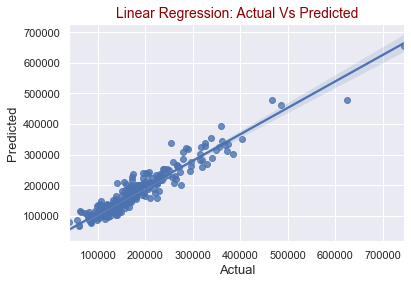

In [213]:
y_test_result = np.exp(y_test).to_frame()
y_test_result.rename(columns = {'SalePrice_Log':'Actual Sale Price'}, inplace = True) 
y_test_result['Predicted Sale Price'] = pd.Series(list(np.exp(y_pred_test)), index=y_testexp.index)
sns.set(font_scale=1)
ax = sns.regplot(x="Actual Sale Price", y="Predicted Sale Price", data=y_test_result)
plt.title("Linear Regression: Actual Vs Predicted", fontsize = 14, color = "darkred")
plt.xlabel("Actual", fontsize = 13) 
plt.ylabel("Predicted", fontsize = 13)
plt.show()

 <p style="text-align:right;"><a align=right href="#top">Go to Top</a></p>

<a id=section505></a>
### 5.5&nbsp;&nbsp; Decision Tree Regression

In [214]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
parameters = { 'max_depth' : [7,8,9,10] , 'max_features' : [11,12,13,14] ,
               'max_leaf_nodes' : [None, 12,15,18,20] ,'min_samples_split' : [20,25,30],
                'presort': [False,True] , 'random_state': [5] }
            
dtreg = GridSearchCV(DecisionTreeRegressor(), parameters, cv=10, refit=True, verbose=1)
dtreg.fit(X_trains, y_train)

Fitting 10 folds for each of 480 candidates, totalling 4800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4800 out of 4800 | elapsed:   14.5s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [7, 8, 9, 10],
                         'max_features': [11, 12, 13, 14],
                         'max_leaf_nodes':

In [215]:
y_pred_train = dtreg.predict(X_trains)  

In [216]:
y_pred_test = dtreg.predict(X_tests)  

In [217]:
RMSE_DT_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_DT_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [218]:
print('RMSE (Decision Tree Regression) for training set is {}'.format(RMSE_DT_train))
print('RMSE (Decision Tree Regression) for test set is {}'.format(RMSE_DT_test))

RMSE (Decision Tree Regression) for training set is 0.13358602848207202
RMSE (Decision Tree Regression) for test set is 0.18717863021270262


In [194]:
r2_train_DTReg = r2_score(y_train, y_pred_train)
print('R-Squared (Decision Tree Regression) for training set is {}'.format(r2_train_DTReg))
adj_rsq_train_DTReg = 1 - (1-r2_train_DTReg)*(len(y_train)-1)/(len(y_train)-X_trains.shape[1]-1)
print('Adjusted (Decision Tree Regression) R-Squared for training set is {}'.format(adj_rsq_train_DTReg))

R-Squared (Decision Tree Regression) for training set is 0.8852143299940705
Adjusted (Decision Tree Regression) R-Squared for training set is 0.8838205751110844


In [195]:
r2_test_DTReg = r2_score(y_test, y_pred_test)
print('R-Squared (Decision Tree Regression) for Test set is {}'.format(r2_test_DTReg))
adj_rsq_test_DTReg = 1 - (1-r2_test_DTReg)*(len(y_test)-1)/(len(y_test)-X_tests.shape[1]-1)
print('Adjusted (Decision Tree Regression) R-Squared for Test set is {}'.format(adj_rsq_test_DTReg))

R-Squared (Decision Tree Regression) for Test set is 0.7981290470740341
Adjusted (Decision Tree Regression) R-Squared for Test set is 0.7879261830272344


**Comparing test result from Decision Tree Regression**

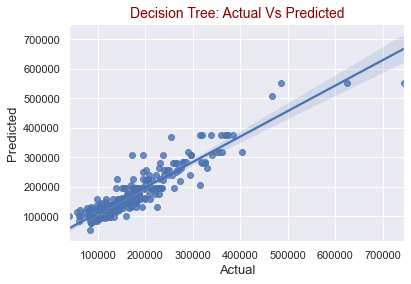

In [219]:
y_test_result = np.exp(y_test).to_frame()
y_test_result.rename(columns = {'SalePrice_Log':'Actual Sale Price'}, inplace = True) 
y_test_result['Predicted Sale Price'] = pd.Series(list(np.exp(y_pred_test)), index=y_testexp.index)
sns.set(font_scale=1)
ax = sns.regplot(x="Actual Sale Price", y="Predicted Sale Price", data=y_test_result)
plt.title("Decision Tree: Actual Vs Predicted", fontsize = 14, color = "darkred")
plt.xlabel("Actual", fontsize = 13) 
plt.ylabel("Predicted", fontsize = 13)
plt.show()

 <p style="text-align:right;"><a align=right href="#top">Go to Top</a></p>

<a id=section506></a>
### 5.6&nbsp;&nbsp; Random Forest Regression

In [220]:
from sklearn.ensemble import RandomForestRegressor
rndreg = RandomForestRegressor(n_estimators = 100, random_state = 0) 
rndreg.fit(X_trains, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [221]:
y_pred_train = rndreg.predict(X_trains)  

In [222]:
y_pred_test = rndreg.predict(X_tests)  

In [223]:
RMSE_RF_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_RF_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [202]:
print('RMSE (Random Forest Regression) for training set is {}'.format(RMSE_RF_train))
print('RMSE (Random Forest Regression) for test set is {}'.format(RMSE_RF_test))

RMSE (Random Forest Regression) for training set is 0.056206908864534125
RMSE (Random Forest Regression) for test set is 0.15580728377779152


In [203]:
r2_train_RFReg = r2_score(y_train, y_pred_train)
print('R-Squared (Random Forest Regression) for training set is {}'.format(r2_train_DTReg))
adj_rsq_train_RFReg = 1 - (1-r2_train_RFReg)*(len(y_train)-1)/(len(y_train)-X_trains.shape[1]-1)
print('Adjusted (Random Forest Regression) R-Squared for training set is {}'.format(adj_rsq_train_RFReg))

R-Squared (Random Forest Regression) for training set is 0.8852143299940705
Adjusted (Random Forest Regression) R-Squared for training set is 0.9794322611839509


In [204]:
r2_test_RFReg = r2_score(y_test, y_pred_test)
print('R-Squared (Random Forest Regression) for Test set is {}'.format(r2_test_RFReg))
adj_rsq_test_RFReg = 1 - (1-r2_test_RFReg)*(len(y_test)-1)/(len(y_test)-X_tests.shape[1]-1)
print('Adjusted (Random Forest Regression) R-Squared for Test set is {}'.format(adj_rsq_test_RFReg))

R-Squared (Random Forest Regression) for Test set is 0.8601260573551627
Adjusted (Random Forest Regression) R-Squared for Test set is 0.8530566162106583


**Comparing test result from Random Forest Regression**

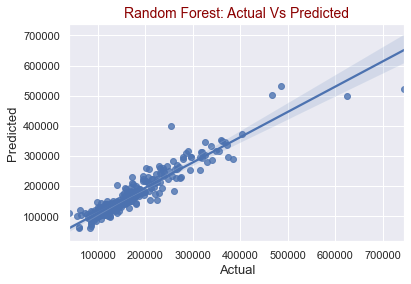

In [225]:
y_test_result = np.exp(y_test).to_frame()
y_test_result.rename(columns = {'SalePrice_Log':'Actual Sale Price'}, inplace = True) 
y_test_result['Predicted Sale Price'] = pd.Series(list(np.exp(y_pred_test)), index=y_testexp.index)
sns.set(font_scale=1)
ax = sns.regplot(x="Actual Sale Price", y="Predicted Sale Price", data=y_test_result)
plt.title("Random Forest: Actual Vs Predicted", fontsize = 14, color = "darkred")
plt.xlabel("Actual", fontsize = 13) 
plt.ylabel("Predicted", fontsize = 13)
plt.show()

 <p style="text-align:right;"><a align=right href="#top">Go to Top</a></p>

<a id=section507></a>
### 5.7&nbsp;&nbsp; Model Evaluation Results

|**Model**        |**RMSE Train**|**RMSE Test**|**Rsq Train**|**Rsq Test**|**Adj Rsq Train**|**Adj Rsq Test**|
| :--             | :--          | :--         |:--          | :--        | :--         | :-- |
|**Linear Regression**       | 0.1540       | 0.1459      | 0.8474       | 0.8455     | 0.8773      | 0.871  |
|**Decision Tree Regression**| 0.1336        |0.1871        |0.8852       |  0.8838     | 0.7981     | 0.7879|
|**Random Forest Regression**      | 0.05620       |0.1558         |0.8852          |0.9794      |  0.8601     | 0.8530|


 <p style="text-align:right;"><a align=right href="#top">Go to Top</a></p>

<a id=section6></a>
## 6. Conclusion

- Top three features on which house price is highly dependent are
    1. OverallQual (Overall material and finish quality)
    2. GrLivArea (Above grade (ground) living area square feet)
    3. Neighborhood	(Physical locations within Ames city limits)
    <br><br>
    
- We perfomed EDA and selected features impacting house sale price strongly are <br>
    OverallQual, YearBuilt, YearRemodAdd, MasVnrArea, TotalBsmtSF, GrLivArea, FullBath, Fireplaces, GarageCars, MSZoning, Neighborhood, ExterQual, BsmtQual, KitchenQual
    <br><br>

- Sales price is almost constant and does not vary much for features like <br>
**Numerical :** MSSubClass,PoolArea,MoSold,3SsnPorch,LowQualFinSF,YrSold,OverallCond,MiscVal,BsmtHalfBath,BsmtFinSF2<br>
**Categorical:**  Utilities, Street, Condition2, RoofMatl, Heating are having almost constant values.
 <br><br>
- We applied Linear Regression, Decision Tree Regression and Random Forest Regression algorithms on data and basis model evaluation **Linear regression** turned out to be giving better predictions than others.

 <p style="text-align:right;"><a align=right href="#top">Go to Top</a></p>